# Topic: Facebook Prophet
## Demo: international-airline-passengers

In [ ]:
! pip install prophet

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/My Drive/LDS0/Topic_1_1/demo/'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS0/Topic_1_1/demo


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
data = pd.read_csv("international-airline-passengers.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   passengers_in_thousands  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.head(2)

,Month,passengers_in_thousands
0,1949-01,112
1,1949-02,118


In [ ]:
data.tail(2)

,Month,passengers_in_thousands
142,1960-11,390
143,1960-12,432


In [ ]:
data["Month"] = pd.to_datetime(data["Month"])

In [ ]:
data.dtypes

Month                      datetime64[ns]
passengers_in_thousands             int64
dtype: object

In [ ]:
df = data.copy()

In [ ]:
df.columns = ["ds", "y"]

In [ ]:
df.y = df.y.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


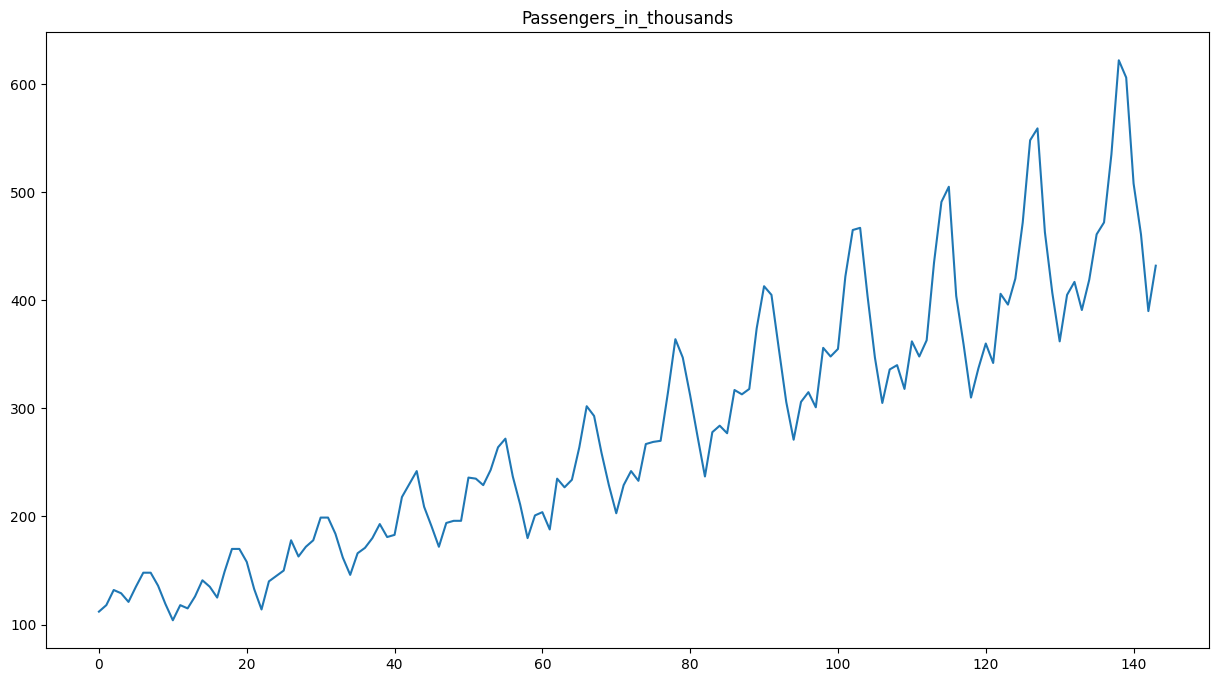

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.y)
plt.title("Passengers_in_thousands")
plt.show()

In [ ]:
144.0/12.0

12.0

In [ ]:
# train vs test: train 10 years, test 2 years
train = df.drop(df.index[-24:])
train.tail()

,ds,y
115,1958-08-01,505.0
116,1958-09-01,404.0
117,1958-10-01,359.0
118,1958-11-01,310.0
119,1958-12-01,337.0


In [ ]:
test = df.drop(df.index[0:-24])

In [ ]:
test.head(2)

,ds,y
120,1959-01-01,360.0
121,1959-02-01,342.0


In [ ]:
test.tail(2)

,ds,y
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:
len(train), len(test)

(120, 24)

#### Build model - Prophet

In [ ]:
model = Prophet(yearly_seasonality=True, \
            daily_seasonality=False, weekly_seasonality=False) 

In [ ]:
model.fit(train)

In [ ]:
# 24 months in test and 12 months to predict new values
months = pd.date_range('1959-01-01','1961-12-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()    
future = pd.DataFrame(months)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [ ]:
# Use the model to make a forecast
forecast = model.predict(future)

In [ ]:
forecast[["ds", "yhat"]].head()

,ds,yhat
0,1959-01-01,390.403615
1,1959-02-01,387.885236
2,1959-03-01,418.931913
3,1959-04-01,413.008605
4,1959-05-01,417.697690


In [ ]:
forecast[["ds", "yhat"]].tail()

,ds,yhat
31,1961-08-01,556.625435
32,1961-09-01,517.663283
33,1961-10-01,485.362623
34,1961-11-01,456.953132
35,1961-12-01,483.490727


#### Evaluate

In [ ]:
df.y.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: y, dtype: float64

In [ ]:
test.y.describe()

count     24.000000
mean     452.250000
std       76.283368
min      342.000000
25%      402.750000
50%      426.000000
75%      481.000000
max      622.000000
Name: y, dtype: float64

In [ ]:
# calculate MAE/RMSE between expected and predicted values for december
y_test = test['y'].values
y_pred = forecast['yhat'].values[:24]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae_p)

MAE: 31.164


In [ ]:
rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)

RMSE: 40.352


- Mean test = 452, std = 76.28 => both mae & rmse < std  -> ok

<ipython-input-31-c05a83712602>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.y)


<Axes: xlabel='y', ylabel='Density'>

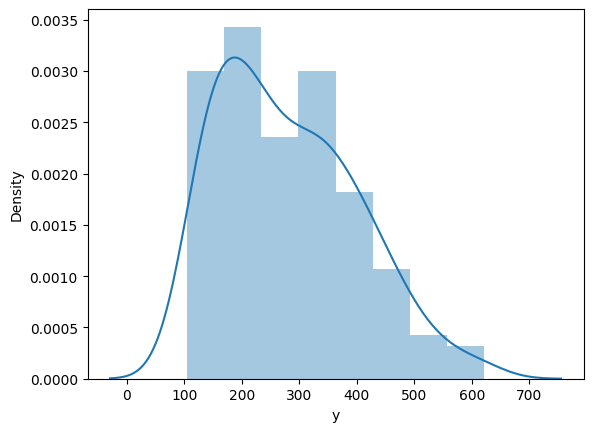

In [ ]:
sns.distplot(df.y)

<ipython-input-32-c1e97d79bd5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.y)


<Axes: xlabel='y', ylabel='Density'>

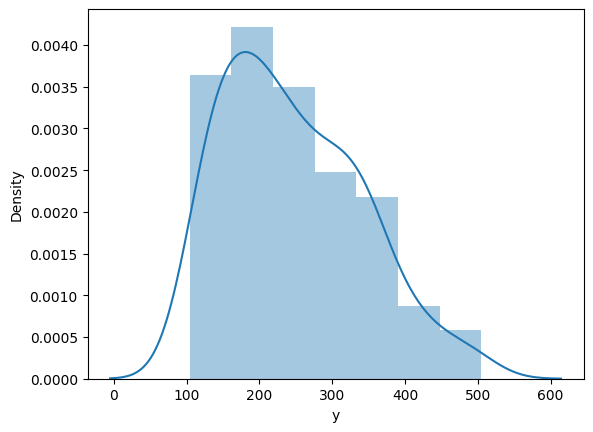

In [ ]:
sns.distplot(train.y)

<ipython-input-33-2c44b65ce24e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test.y)


<Axes: xlabel='y', ylabel='Density'>

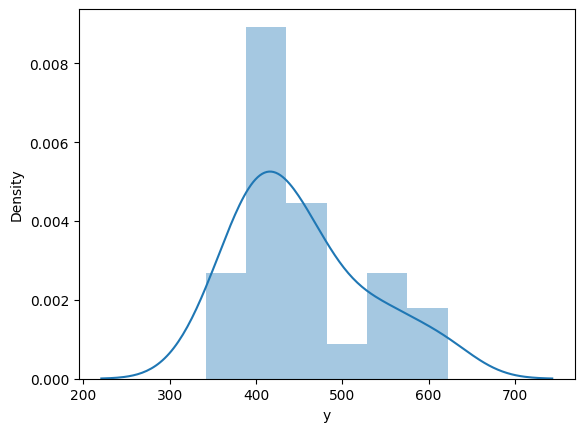

In [ ]:
sns.distplot(test.y)

- We can use this model to predict international airline passengers in the near future

In [ ]:
y_test

array([360., 342., 406., 396., 420., 472., 548., 559., 463., 407., 362.,
       405., 417., 391., 419., 461., 472., 535., 622., 606., 508., 461.,
       390., 432.])

In [ ]:
y_pred 

array([390.40361544, 387.88523553, 418.93191285, 413.00860481,
       417.69768967, 452.53622815, 487.20203122, 484.88018858,
       447.38140523, 415.12942021, 386.2815862 , 413.33761691,
       425.54899832, 424.03043924, 457.50839549, 450.54798416,
       451.15828013, 489.77714804, 518.50228882, 522.04964104,
       482.40426351, 450.08370441, 421.91304785, 448.17066383])

In [ ]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

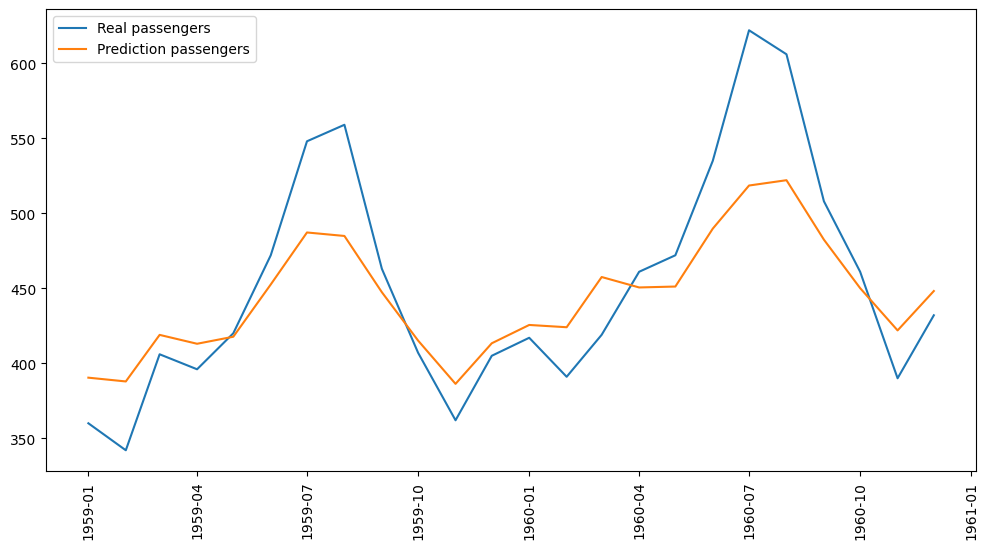

In [ ]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real passengers')
plt.plot(y_pred_value, label='Prediction passengers')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

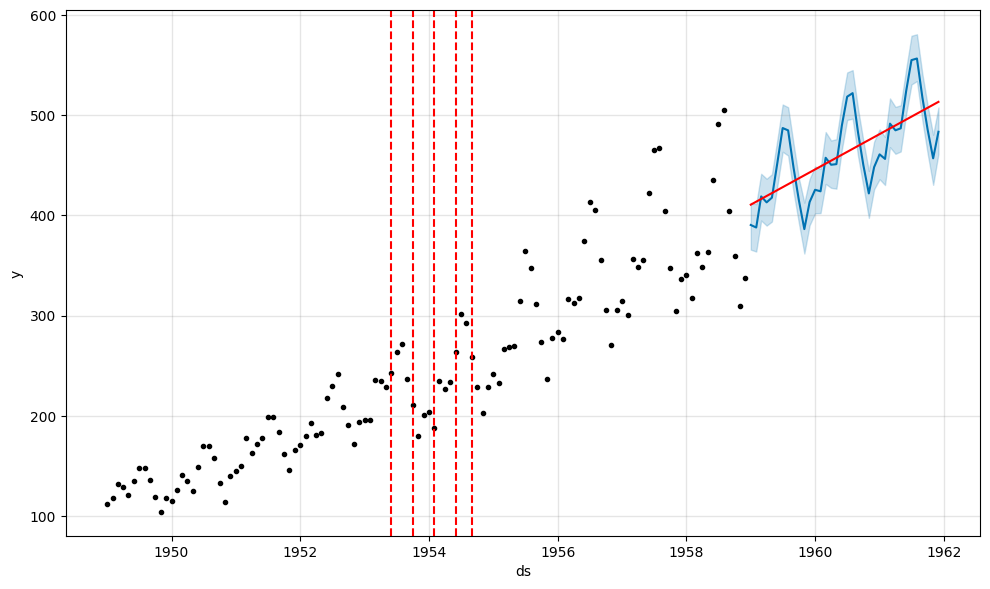

In [ ]:
fig = model.plot(forecast) 
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, forecast)

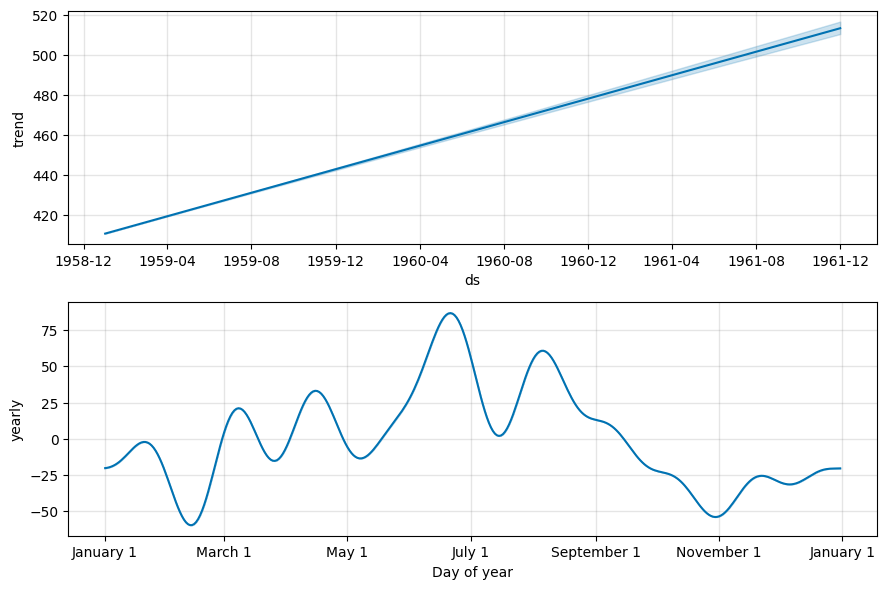

In [ ]:
fig1 = model.plot_components(forecast)
fig1.show()

#### Predition for the next 12 months

In [ ]:
forecast[["ds", "yhat"]].tail(12)

,ds,yhat
24,1961-01-01,460.933488
25,1961-02-01,456.375528
26,1961-03-01,491.612492
27,1961-04-01,484.949153
28,1961-05-01,486.920144
29,1961-06-01,524.287588
30,1961-07-01,555.018746
31,1961-08-01,556.625435
32,1961-09-01,517.663283
33,1961-10-01,485.362623


#### Long-term prediction for the next 5 years => Can we expand business?

In [ ]:
m = Prophet(yearly_seasonality=True, \
            daily_seasonality=False, weekly_seasonality=False) 
m.fit(df)
future = m.make_future_dataframe(periods=12*5, freq='M') # next 5 years

In [ ]:
forecast = m.predict(future) 

In [ ]:
forecast.shape

(204, 16)

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          204 non-null    datetime64[ns]
 1   trend                       204 non-null    float64       
 2   yhat_lower                  204 non-null    float64       
 3   yhat_upper                  204 non-null    float64       
 4   trend_lower                 204 non-null    float64       
 5   trend_upper                 204 non-null    float64       
 6   additive_terms              204 non-null    float64       
 7   additive_terms_lower        204 non-null    float64       
 8   additive_terms_upper        204 non-null    float64       
 9   yearly                      204 non-null    float64       
 10  yearly_lower                204 non-null    float64       
 11  yearly_upper                204 non-null    float64       

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
192,1964-12-31,609.133908,580.263755,636.939547,634.876657,629.282547,640.675777
193,1965-01-31,601.743628,571.278003,632.559328,638.002497,632.287673,643.903406
194,1965-02-28,646.837525,619.358928,676.346170,640.825836,634.953699,646.896552
195,1965-03-31,635.211543,606.854178,662.922379,643.951676,637.945217,650.176953
196,1965-04-30,646.634263,617.480683,676.607037,646.976683,640.748229,653.409530
197,1965-05-31,680.963805,648.875042,710.164812,650.102522,643.670868,656.755222
198,1965-06-30,724.699576,695.055945,756.326041,653.127529,646.535953,659.957331
199,1965-07-31,723.229566,693.811331,752.760107,656.253369,649.514178,663.187216
200,1965-08-31,677.361311,649.640781,707.322612,659.379208,652.417910,666.517487
201,1965-09-30,640.098472,610.736444,668.519489,662.404215,655.219737,669.703841


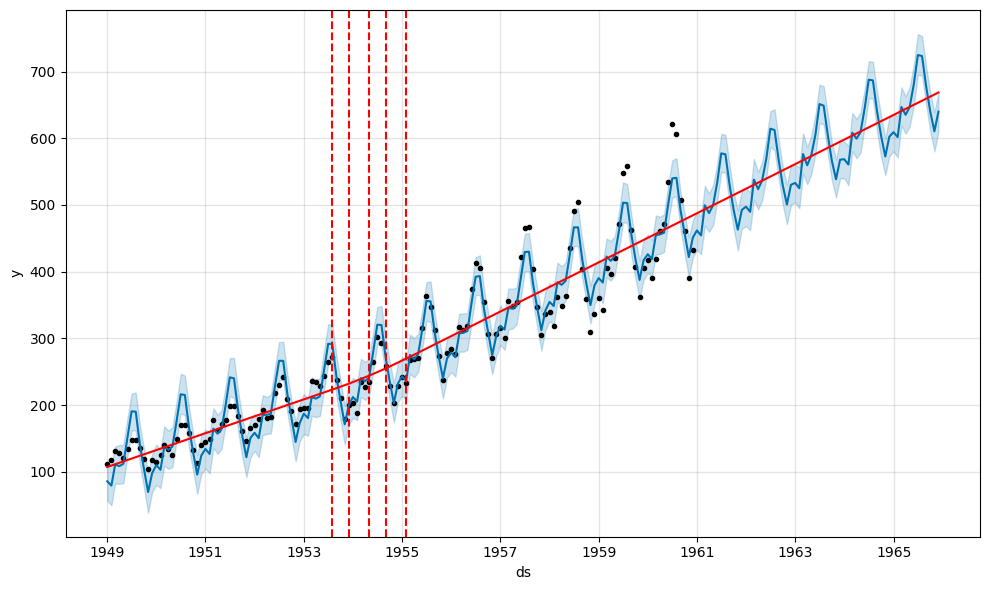

In [ ]:
fig = m.plot(forecast) 
fig.show()
a = add_changepoints_to_plot(fig.gca(), m, forecast)

https://facebook.github.io/prophet/docs/trend_changepoints.html
Bạn có thể nhận thấy rằng chuỗi thời gian thực thường có những thay đổi đột ngột trong quỹ đạo của chúng. Theo mặc định, Prophet sẽ tự động phát hiện những điểm thay đổi (changepoint) này và sẽ cho phép  trend điều chỉnh một cách thích hợp.
Theo mặc định, Prophet chỉ định 25 changepoint tiềm năng được đặt đồng nhất trong 80% đầu tiên của TimeSeries. Các đường thẳng đứng trong hình trên cho biết nơi đặt các changepoint tiềm năng.


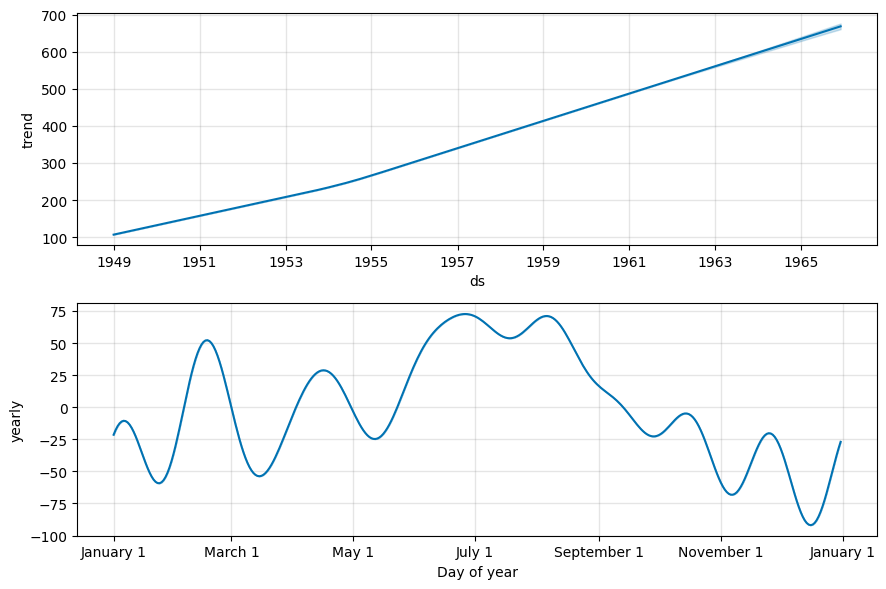

In [ ]:
fig1 = m.plot_components(forecast)
fig1.show()

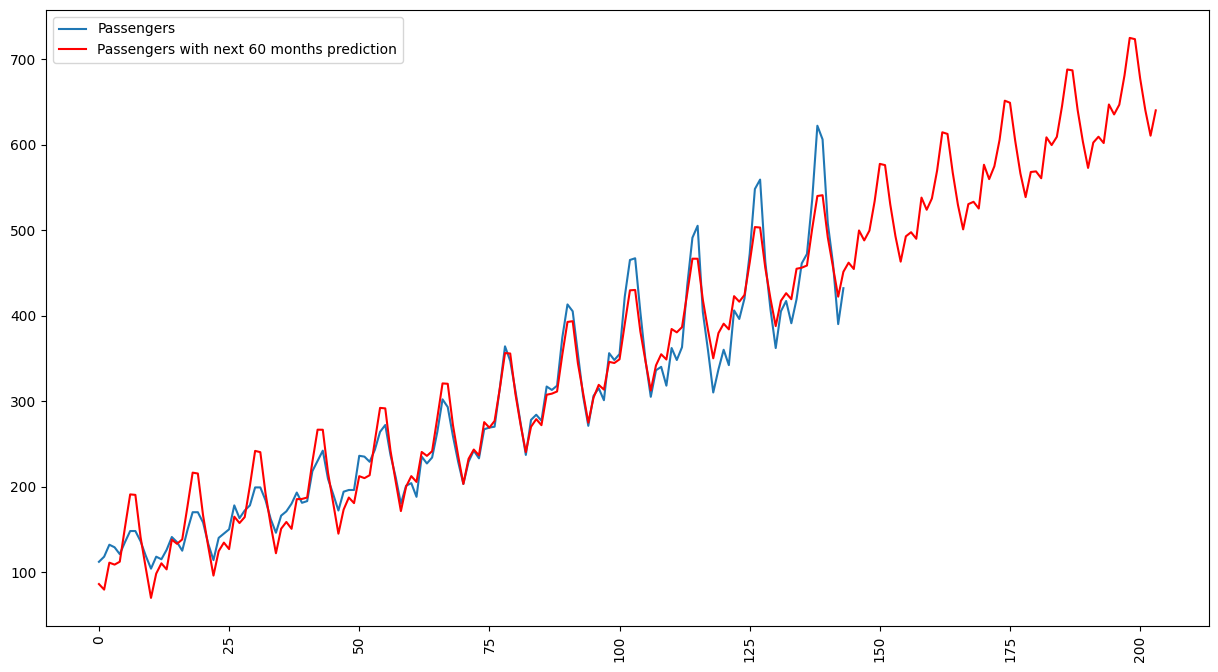

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df['y'], label='Passengers')
plt.plot(forecast['yhat'], label='Passengers with next 60 months prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

- Based on the above results, we can see that business expansion is possible.